<a href="https://colab.research.google.com/github/JairDel/Proyecto3/blob/main/RedesNeuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.17.0'

In [ ]:
keras.__version__

'3.4.1'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(type(fashion_mnist))
print(type(X_train_full))
print(type(y_train_full))
print(type(X_test))
print(y_test.shape)
print(X_train_full.shape)
print(X_train_full.shape)


<class 'module'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(10000,)
(60000, 28, 28)
(60000, 28, 28)


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(X_valid.shape)
print(y_valid.shape)
print(X_train.shape)
print(y_train.shape)
print(X_valid)

(5000, 28, 28)
(5000,)
(55000, 28, 28)
(55000,)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [ ]:
class_names[y_train[375]]

'Ankle boot'

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

print(model)

<Sequential name=sequential, built=True>


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-2.6022281e-02,  3.6990412e-02, -7.3228993e-02, ...,
        -3.5022415e-02,  7.3831871e-02,  4.0506326e-02],
       [ 2.2384606e-02,  2.1067195e-02,  5.1225498e-02, ...,
        -1.3128601e-02, -4.6532281e-02,  1.0780990e-05],
       [ 3.4613967e-02, -4.3915913e-02,  5.2357957e-02, ...,
         4.3271385e-02,  4.7699682e-02, -1.3018858e-02],
       ...,
       [ 2.9340364e-02, -2.2807475e-02, -4.5557886e-02, ...,
        -9.3955249e-03, -7.1575046e-02, -3.0827001e-03],
       [ 4.7569022e-02, -3.7115518e-02,  3.7659802e-02, ...,
         5.9851140e-02,  3.2136098e-02, -2.8029036e-02],
       [-6.8882652e-02, -2.5674265e-02, -1.0526635e-02, ...,
         5.6412220e-03, -5.5226330e-02,  3.7036836e-03]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6895 - loss: 0.9919 - val_accuracy: 0.8222 - val_loss: 0.5136
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8245 - loss: 0.5042 - val_accuracy: 0.8428 - val_loss: 0.4550
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8432 - loss: 0.4477 - val_accuracy: 0.8544 - val_loss: 0.4277
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8514 - loss: 0.4197 - val_accuracy: 0.8664 - val_loss: 0.3872
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8591 - loss: 0.3997 - val_accuracy: 0.8618 - val_loss: 0.3833
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8655 - loss: 0.3817 - val_accuracy: 0.8662 - val_loss: 0.3794
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8711 - loss: 0.3613 - val_accuracy: 0.8740 - val_loss: 0.3626
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8777 - loss: 0.3475 - 

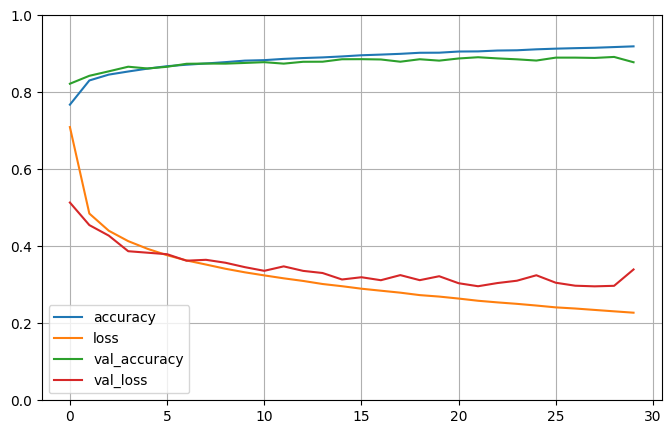

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8274 - loss: 83.8363


[87.8488540649414, 0.8223999738693237]

In [ ]:
X_new = X_test[:3]
print(X_new)
y_proba = model.predict(X_new)
y_proba.round(2)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_proba = model.predict(X_new) # Predict probabilities for each class
y_pred = y_proba.argmax(axis=-1) # Get the class with highest probability
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([9, 2, 1])

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.5326 - val_loss: 0.7324
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5037 - val_loss: 0.4192
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4342 - val_loss: 0.4004
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4133 - val_loss: 0.3887
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4664 - val_loss: 0.3826
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4003 - val_loss: 0.5217
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4568 - val_loss: 0.3740
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4082 - val_loss: 0.3697
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3878 - val_loss: 0.3672
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4141 - val_loss: 0.3683
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3720 - val_loss: 0.3656
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.

In [ ]:
print("mse_test:")
print(mse_test)
print(type(mse_test))
print("y_pred:")
print(y_pred)
print(type(y_pred))
print("X_new:")
print(X_new)
print(type(X_new))

mse_test:
0.34954389929771423
<class 'float'>
y_pred:
[[2.3365932]
 [1.6877338]
 [3.1291752]]
<class 'numpy.ndarray'>
X_new:
[[-0.47071867  1.84907593  0.06484466  0.13892143 -0.562024   -0.0670108
   1.00323307 -1.34179937]
 [ 0.25545825  0.17989821  0.21031961 -0.32456674 -0.74084521 -0.12697167
  -0.68555394  1.15478546]
 [-0.12345372  0.0209289  -0.48976915 -0.02325767 -0.32056999 -0.26225661
  -0.89138948  0.70131396]]
<class 'numpy.ndarray'>


In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1))
    optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
!pip install scikeras

import tensorflow as tf
from scikeras.wrappers import KerasRegressor

keras_reg = KerasRegressor(build_fn=build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2822 - val_loss: 0.9197
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6073 - val_loss: 1.4066
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5457 - val_loss: 0.4806
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4934 - val_loss: 0.5268
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4756 - val_loss: 0.4644
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4618 - val_loss: 0.4575
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4685 - val_loss: 0.4138
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4684 - val_loss: 0.6581
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4322 - val_loss: 0.3975
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4393 - val_loss: 0.3979
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4245 - val_loss: 0.4345
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [ ]:
from scikeras.wrappers import KerasRegressor
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_distribs = {
    "model__n_hidden": [0, 1, 2, 3],  # el prefijo model__ permite a RandomizedSearchCV reconocer los parámetros específicos de KerasRegressor.
                                    #Esto debería resolver el error y permitir la búsqueda aleatoria de los mejores hiperparámetros del modelo.
    "model__n_neurons": np.arange(1, 100),
    "model__learning_rate": reciprocal(3e-4, 3e-2),
}

keras_reg = KerasRegressor(
    model=build_model,
    n_hidden=1,  # Valor inicial
    n_neurons=30,  # Valor inicial
    learning_rate=3e-3  # Valor inicial
)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)],
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.3394 - val_loss: 1.3276
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6740 - val_loss: 0.6967
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5758 - val_loss: 0.5061
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5131 - val_loss: 0.4643
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4714 - val_loss: 0.4514
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4840 - val_loss: 0.4140
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4452 - val_loss: 0.4162
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4444 - val_loss: 0.5681
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4136 - val_loss: 0.3998
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4199 - val_loss: 0.4574
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4060 - val_loss: 0.4232
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1943 - val_loss: 0.6400
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6786 - val_loss: 0.5711
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5665 - val_loss: 0.4960
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5327 - val_loss: 0.4809
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4921 - val_loss: 0.4277
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4743 - val_loss: 0.4366
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4468 - val_loss: 0.4080
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4395 - val_loss: 0.4053
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4402 - val_loss: 0.3921
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4632 - val_loss: 0.3957
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4324 - val_loss: 0.3889
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0285 - val_loss: 22.0442
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4106 - val_loss: 0.5361
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5259 - val_loss: 0.4581
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4666 - val_loss: 0.4156
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4245 - val_loss: 0.3949
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4132 - val_loss: 0.3844
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3887 - val_loss: 0.3762
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3941 - val_loss: 0.3687
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4128 - val_loss: 0.3665
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3784 - val_loss: 0.3650
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3689 - val_loss: 0.3639
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4091 - val_loss: 1.4952
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2667 - val_loss: 0.8713
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8847 - val_loss: 0.7335
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7314 - val_loss: 0.6869
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7152 - val_loss: 0.6610
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6710 - val_loss: 0.6395
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6820 - val_loss: 0.6267
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6825 - val_loss: 0.6122
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6581 - val_loss: 0.5970
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6466 - val_loss: 0.5866
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6282 - val_loss: 0.5780
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.3285 - val_loss: 2.4978
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4704 - val_loss: 2.0483
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9980 - val_loss: 1.6170
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8494 - val_loss: 1.2538
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7566 - val_loss: 0.9975
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7585 - val_loss: 0.8435
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7381 - val_loss: 0.7355
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6943 - val_loss: 0.6670
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7023 - val_loss: 0.6260
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6696 - val_loss: 0.6024
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6685 - val_loss: 0.5894
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8348 - val_loss: 1.4978
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.2542 - val_loss: 1.0755
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8906 - val_loss: 0.8219
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8031 - val_loss: 0.7440
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7366 - val_loss: 0.7088
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7421 - val_loss: 0.6882
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7292 - val_loss: 0.6706
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7222 - val_loss: 0.6520
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6509 - val_loss: 0.6367
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6561 - val_loss: 0.6191
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6565 - val_loss: 0.6093
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.5462 - val_loss: 1.3613
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6785 - val_loss: 0.8134
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6597 - val_loss: 0.5534
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5746 - val_loss: 0.5331
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5767 - val_loss: 0.5170
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5423 - val_loss: 0.4811
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4996 - val_loss: 0.4710
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4869 - val_loss: 0.4538
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4806 - val_loss: 0.4491
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4658 - val_loss: 0.4495
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4468 - val_loss: 0.4436
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9835 - val_loss: 0.7736
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7961 - val_loss: 0.6666
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7116 - val_loss: 0.6202
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6699 - val_loss: 0.5816
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6197 - val_loss: 0.5547
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6074 - val_loss: 0.5275
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5683 - val_loss: 0.5067
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5331 - val_loss: 0.4890
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5219 - val_loss: 0.4762
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5078 - val_loss: 0.4743
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4909 - val_loss: 0.4520
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1927 - val_loss: 10.2155
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2287 - val_loss: 1.1349
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7232 - val_loss: 0.7735
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6245 - val_loss: 0.6379
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6134 - val_loss: 0.5676
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5746 - val_loss: 0.5241
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5591 - val_loss: 0.4964
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5055 - val_loss: 0.4791
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4977 - val_loss: 0.4630
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4700 - val_loss: 0.4531
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4616 - val_loss: 0.4464
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.9658 - val_loss: 1.2540
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9248 - val_loss: 0.7308
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6940 - val_loss: 0.6538
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6820 - val_loss: 0.6086
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5940 - val_loss: 0.5728
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5682 - val_loss: 0.5438
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5699 - val_loss: 0.5192
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5462 - val_loss: 0.4993
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4984 - val_loss: 0.4820
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5045 - val_loss: 0.4684
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4808 - val_loss: 0.4527
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0182 - val_loss: 1.2192
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9185 - val_loss: 0.7210
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8032 - val_loss: 0.6771
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7407 - val_loss: 0.6747
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7287 - val_loss: 0.6444
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6747 - val_loss: 0.6391
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6809 - val_loss: 0.6111
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6274 - val_loss: 0.5962
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6503 - val_loss: 0.5595
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6041 - val_loss: 0.5477
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5941 - val_loss: 0.5263
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8550 - val_loss: 1.1190
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9845 - val_loss: 0.7523
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7373 - val_loss: 0.6770
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7267 - val_loss: 0.6402
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6781 - val_loss: 0.6176
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6509 - val_loss: 0.5961
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6248 - val_loss: 0.5802
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5976 - val_loss: 0.5652
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5900 - val_loss: 0.5516
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5616 - val_loss: 0.5402
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6020 - val_loss: 0.5257
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0796 - val_loss: 2.3645
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9459 - val_loss: 1.5841
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1940 - val_loss: 1.1189
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9576 - val_loss: 0.8705
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8648 - val_loss: 0.7793
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7834 - val_loss: 0.7297
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7288 - val_loss: 0.7012
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7562 - val_loss: 0.6831
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7132 - val_loss: 0.6680
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7174 - val_loss: 0.6539
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6863 - val_loss: 0.6465
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4917 - val_loss: 2.4954
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9790 - val_loss: 1.9689
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1485 - val_loss: 1.7448
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9202 - val_loss: 1.4896
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8275 - val_loss: 1.2547
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7296 - val_loss: 1.0897
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7463 - val_loss: 0.9567
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6919 - val_loss: 0.8563
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6893 - val_loss: 0.7775
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6709 - val_loss: 0.7177
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6557 - val_loss: 0.6729
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.5072 - val_loss: 3.2030
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0782 - val_loss: 2.0860
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2962 - val_loss: 1.3348
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0065 - val_loss: 1.0086
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8627 - val_loss: 0.8295
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8079 - val_loss: 0.7467
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7543 - val_loss: 0.7021
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7095 - val_loss: 0.6747
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7227 - val_loss: 0.6557
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6830 - val_loss: 0.6414
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6430 - val_loss: 0.6284
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2233 - val_loss: 0.6444
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6769 - val_loss: 0.5848
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5702 - val_loss: 0.4838
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4902 - val_loss: 0.4440
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4557 - val_loss: 0.4407
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4541 - val_loss: 0.5720
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4300 - val_loss: 0.4338
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4244 - val_loss: 0.3864
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4071 - val_loss: 0.3895
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3958 - val_loss: 0.3829
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4182 - val_loss: 0.3776
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9515 - val_loss: 0.8623
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6976 - val_loss: 0.5765
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6074 - val_loss: 0.5021
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5411 - val_loss: 0.4653
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4962 - val_loss: 0.4364
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4723 - val_loss: 0.4167
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4328 - val_loss: 0.3989
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4434 - val_loss: 0.3935
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4397 - val_loss: 0.3836
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4037 - val_loss: 0.3803
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4169 - val_loss: 0.3787
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.3753 - val_loss: 2.9221
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8169 - val_loss: 1.3989
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6198 - val_loss: 0.5244
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5241 - val_loss: 0.4715
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4598 - val_loss: 0.4427
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4633 - val_loss: 0.4288
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4464 - val_loss: 0.4156
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4320 - val_loss: 0.4001
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4140 - val_loss: 0.3939
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4003 - val_loss: 0.3893
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4254 - val_loss: 0.3851
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.3830 - val_loss: 0.9409
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9168 - val_loss: 0.7193
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7218 - val_loss: 0.6633
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7205 - val_loss: 0.6539
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6692 - val_loss: 0.6077
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6269 - val_loss: 0.6188
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6431 - val_loss: 0.5665
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6338 - val_loss: 0.5840
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5954 - val_loss: 0.5352
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6009 - val_loss: 0.5579
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5677 - val_loss: 0.5294
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.3537 - val_loss: 2.0853
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9740 - val_loss: 1.2238
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7507 - val_loss: 0.8470
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7241 - val_loss: 0.6844
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6805 - val_loss: 0.6146
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6608 - val_loss: 0.5751
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6231 - val_loss: 0.5503
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6195 - val_loss: 0.5348
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6150 - val_loss: 0.5213
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5870 - val_loss: 0.5096
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5632 - val_loss: 0.4982
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.2525 - val_loss: 0.8366
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8425 - val_loss: 0.7000
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6682 - val_loss: 0.6534
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7014 - val_loss: 0.6219
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6421 - val_loss: 0.6041
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6255 - val_loss: 0.5717
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6027 - val_loss: 0.5524
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5861 - val_loss: 0.5347
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5825 - val_loss: 0.5323
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5389 - val_loss: 0.5119
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5443 - val_loss: 0.5001
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3419 - val_loss: 0.6638
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9719 - val_loss: 0.4946
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4702 - val_loss: 0.4805
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4301 - val_loss: 0.4028
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4248 - val_loss: 0.4053
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4204 - val_loss: 0.4890
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4040 - val_loss: 0.4087
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4054 - val_loss: 0.4432
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3951 - val_loss: 0.3908
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4334 - val_loss: 0.3813
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4019 - val_loss: 0.3729
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2586 - val_loss: 1.2335
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4771 - val_loss: 0.4306
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4642 - val_loss: 0.4816
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4414 - val_loss: 1.1664
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4380 - val_loss: 2.1333
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4043 - val_loss: 3.3227
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4417 - val_loss: 0.4187
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4067 - val_loss: 0.3935
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4044 - val_loss: 0.3849
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3927 - val_loss: 0.3719
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4012 - val_loss: 0.3672
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9270 - val_loss: 0.5173
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4898 - val_loss: 19.2987
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6904 - val_loss: 0.3953
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6040 - val_loss: 0.4346
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5172 - val_loss: 0.3921
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4394 - val_loss: 0.3736
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4173 - val_loss: 0.3603
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3931 - val_loss: 0.3582
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3809 - val_loss: 0.3622
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3691 - val_loss: 0.3951
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3695 - val_loss: 0.3553
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.5672 - val_loss: 247.5184
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 157.3178 - val_loss: 7399.3711
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3261.7390 - val_loss: 207729.6875
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1216.5206 - val_loss: 6375429.5000
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3610105.0000 - val_loss: 190150736.0000
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45291948.0000 - val_loss: 5322443264.0000
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3322274560.0000 - val_loss: 161069121536.0000
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2358258688.0000 - val_loss: 4413562814464.0000
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1226252353536.0000 - val_loss: 131736017043456.0000
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 26296568512512.0000 - val_loss: 39648974486896

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1724, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kw

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9102 - val_loss: 4.9993
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7251 - val_loss: 1.7937
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6044 - val_loss: 0.9059
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5502 - val_loss: 3.5760
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5872 - val_loss: 1.6321
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5730 - val_loss: 0.6017
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5420 - val_loss: 1.3305
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5796 - val_loss: 0.7605
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5653 - val_loss: 0.6781
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5601 - val_loss: 0.6662
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5531 - val_loss: 0.5933
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.1623 - val_loss: 148.2418
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.0773 - val_loss: 5321.1733
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1045.3053 - val_loss: 208167.3125
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22246.5742 - val_loss: 8084537.0000
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 870048.5000 - val_loss: 315059968.0000
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 16710525.0000 - val_loss: 12287679488.0000
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71660128.0000 - val_loss: 484089495552.0000
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10289977344.0000 - val_loss: 18830678032384.0000
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 480382713856.0000 - val_loss: 733827844538368.0000
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9920148668416.0000 - val_loss: 2863720554718822

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 455, in __call__
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1127, in score
    return self.scorer(y, y_pred, sample_weight=sample_weight, **score_args)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py", line 1724, in scorer
    return sklearn_r2_score(y_true, y_pred, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 213, in wrapper
    return func(*args, **kw

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.8393 - val_loss: 1.7515
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.3450 - val_loss: 1.1179
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9548 - val_loss: 0.8210
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7972 - val_loss: 0.7121
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7444 - val_loss: 0.6568
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6679 - val_loss: 0.6265
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6852 - val_loss: 0.6072
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6278 - val_loss: 0.5868
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6054 - val_loss: 0.5704
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6129 - val_loss: 0.5557
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6017 - val_loss: 0.5419
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.4357 - val_loss: 2.9241
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3210 - val_loss: 2.5534
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0016 - val_loss: 1.7540
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8707 - val_loss: 1.3357
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7594 - val_loss: 1.1219
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7350 - val_loss: 0.9322
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7297 - val_loss: 0.8134
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6792 - val_loss: 0.7104
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6866 - val_loss: 0.6302
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6507 - val_loss: 0.5891
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6190 - val_loss: 0.5525
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5.1101 - val_loss: 2.3000
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.7924 - val_loss: 1.4926
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0863 - val_loss: 1.0077
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8466 - val_loss: 0.7585
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7334 - val_loss: 0.6796
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7053 - val_loss: 0.6462
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6445 - val_loss: 0.6277
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6530 - val_loss: 0.6057
Epoch 9/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6239 - val_loss: 0.5936
Epoch 10/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6063 - val_loss: 0.5829
Epoch 11/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6209 - val_loss: 0.5697
Epoch 12/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [0.74576483 0.68704419 0.72495096 0.7289663  0.69249402 0.75989386
 0.71093189 0.75001708        nan 0.72813189]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1180 - val_loss: 1.2144
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6354 - val_loss: 0.6124
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5504 - val_loss: 0.4637
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4790 - val_loss: 0.4366
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4821 - val_loss: 0.4166
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4367 - val_loss: 0.4099
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4202 - val_loss: 0.3977
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4188 - val_loss: 0.3913
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4137 - val_loss: 0.3878
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3902 - val_loss: 0.3737
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3894 - val_loss: 0.3761
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(learning_rate=0.003, model=<function build_model at 0x7caafeec5ab0>, n_hidden=1, n_neurons=30),
                   param_distributions={'model__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7cab1cf67370>,
                                        'model__n_hidden': [0, 1, 2, 3],
                                        'model__n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [ ]:
rnd_search_cv.best_params_

{'model__learning_rate': 0.0030263828895770914,
 'model__n_hidden': 2,
 'model__n_neurons': 97}

In [ ]:
rnd_search_cv.best_score_

0.7598938634785233

In [ ]:
model=rnd_search_cv.best_estimator_.model

***Creating the Training Dataset***

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
import os


shakespare_url = "https://homl.info/shakespeare"
filepath = tf.keras.utils.get_file("shakespeare.txt", shakespare_url)
with open(filepath) as f:
    shakespeare_text = f.read()

In [ ]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(shakespeare_text)

In [ ]:
tokenizer.texts_to_sequences(["First"])

[[20, 6, 9, 8, 3]]

In [ ]:
tokenizer.sequences_to_texts([[20, 6, 9, 8, 3]])

['f i r s t']

In [ ]:
max_id = len(tokenizer.word_index)
dataset_size = tokenizer.document_count
print(max_id)
print(dataset_size)

39
1115394


In [ ]:
[encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

In [ ]:
train_size = dataset_size * 90 // 100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

In [ ]:
n_steps = 100
window_length = n_steps + 1
dataset = dataset.window(window_length, shift=1, drop_remainder=True)

In [ ]:
dataset = dataset.flat_map(lambda window: window.batch(window_length))

In [ ]:
batch_size = 32
dataset = dataset.shuffle(10000).batch(batch_size)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [ ]:
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch)
)

In [ ]:
dataset = dataset.prefetch(1)

In [ ]:
model = keras.models.Sequential([
    keras.layers.GRU(128, return_sequences=True, input_shape=[None, max_id],
                     dropout=0.2, recurrent_dropout=0.2),
    keras.layers.GRU(128, return_sequences=True,
                     dropout=0.2, recurrent_dropout=0.2),
    keras.layers.TimeDistributed(keras.layers.Dense(max_id,
                                                    activation="softmax"))
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
history = model.fit(dataset, epochs=20, steps_per_epoch=100)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 389ms/step - loss: 3.3988
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - loss: 2.9847
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - loss: 2.6814
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 344ms/step - loss: 2.5115
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - loss: 2.4190
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 336ms/step - loss: 2.3594
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - loss: 2.2834
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 33s 335ms/step - loss: 2.2489
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 357ms/step - loss: 2.2241
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 339ms/step - loss: 2.1991
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 356ms/step - loss: 2.1570
Epoch 12/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 34s 342ms/step - loss: 2.1279
Epoch 13/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 418ms/step - loss: 2.0956
Epoch 14/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 352ms/step - loss: 2.0777
Epoch 15/20
100

In [ ]:
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

In [ ]:
x_new = preprocess(["How are yo"])
y_prob = model.predict(x_new)
y_pred = np.argmax(y_prob, axis=-1)
tokenizer.sequences_to_texts(y_pred + 1)[0][-1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 816ms/step


'u'

In [ ]:
def next_char(text, temperature=1):
    X_new = preprocess([text])
    y_proba = model.predict(X_new)[0, -1:, :]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [ ]:
def complete_text(text, n_chars=50, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [ ]:
print(complete_text("t", temperature=0.2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 920ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━

In [ ]:
print(complete_text("w", temperature=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━

In [ ]:
print(complete_text("w", temperature=2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━